# Multiple Linear Regression
## Bike Sharing Case Study

#### Problem Statement:

Consider a US bike-sharing provider BoomBikes company that has a large dataset on daily bike demands across the American market based on some factors. It wishes to use the data to understand the factors affecting the demand for these shared bikes in the American market based on weather, temperature and other factors.

Essentially, the company wants —


- To create a linear model that quantitatively explains which variables are significant in predicting the demand for shared bikes.

- To know the accuracy of the model, i.e. how well those variables describe the bike demands.


## Step:1 Read and understand the data

In [85]:
#Supress warnings

import warnings
warnings.filterwarnings('ignore')

In [86]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
# Read the data

bike_df = pd.read_csv("day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [88]:
# Data Inspection code (to understand the data)

bike_df.shape

(730, 16)

In [89]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [90]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Since there are 730 rows in total and each column has 730 non-null values therefore, there are no null values present

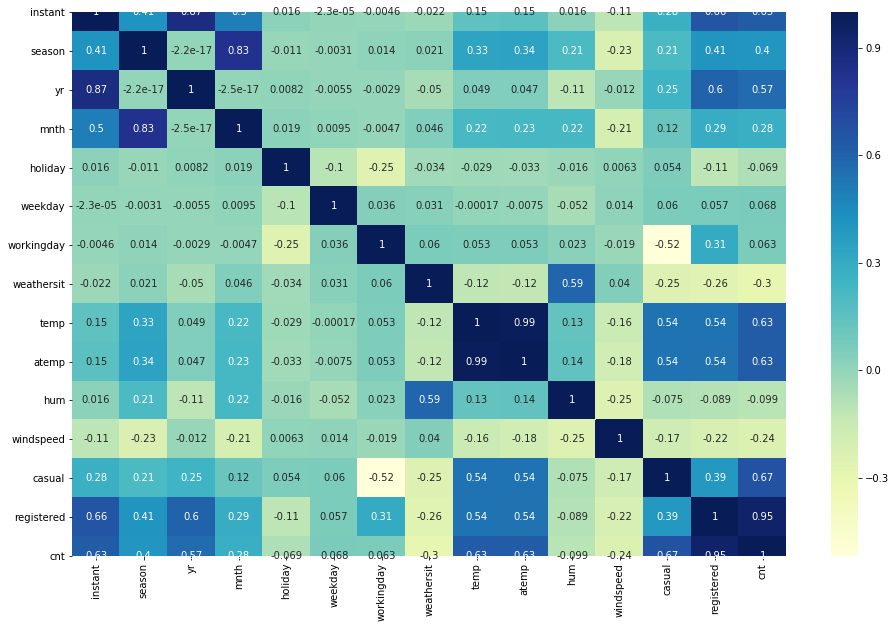

In [91]:
# Correlation between variables in dataframe

plt.figure(figsize = (16, 10))
sns.heatmap(bike_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Step:2  Data Visualization

<Figure size 1440x576 with 0 Axes>

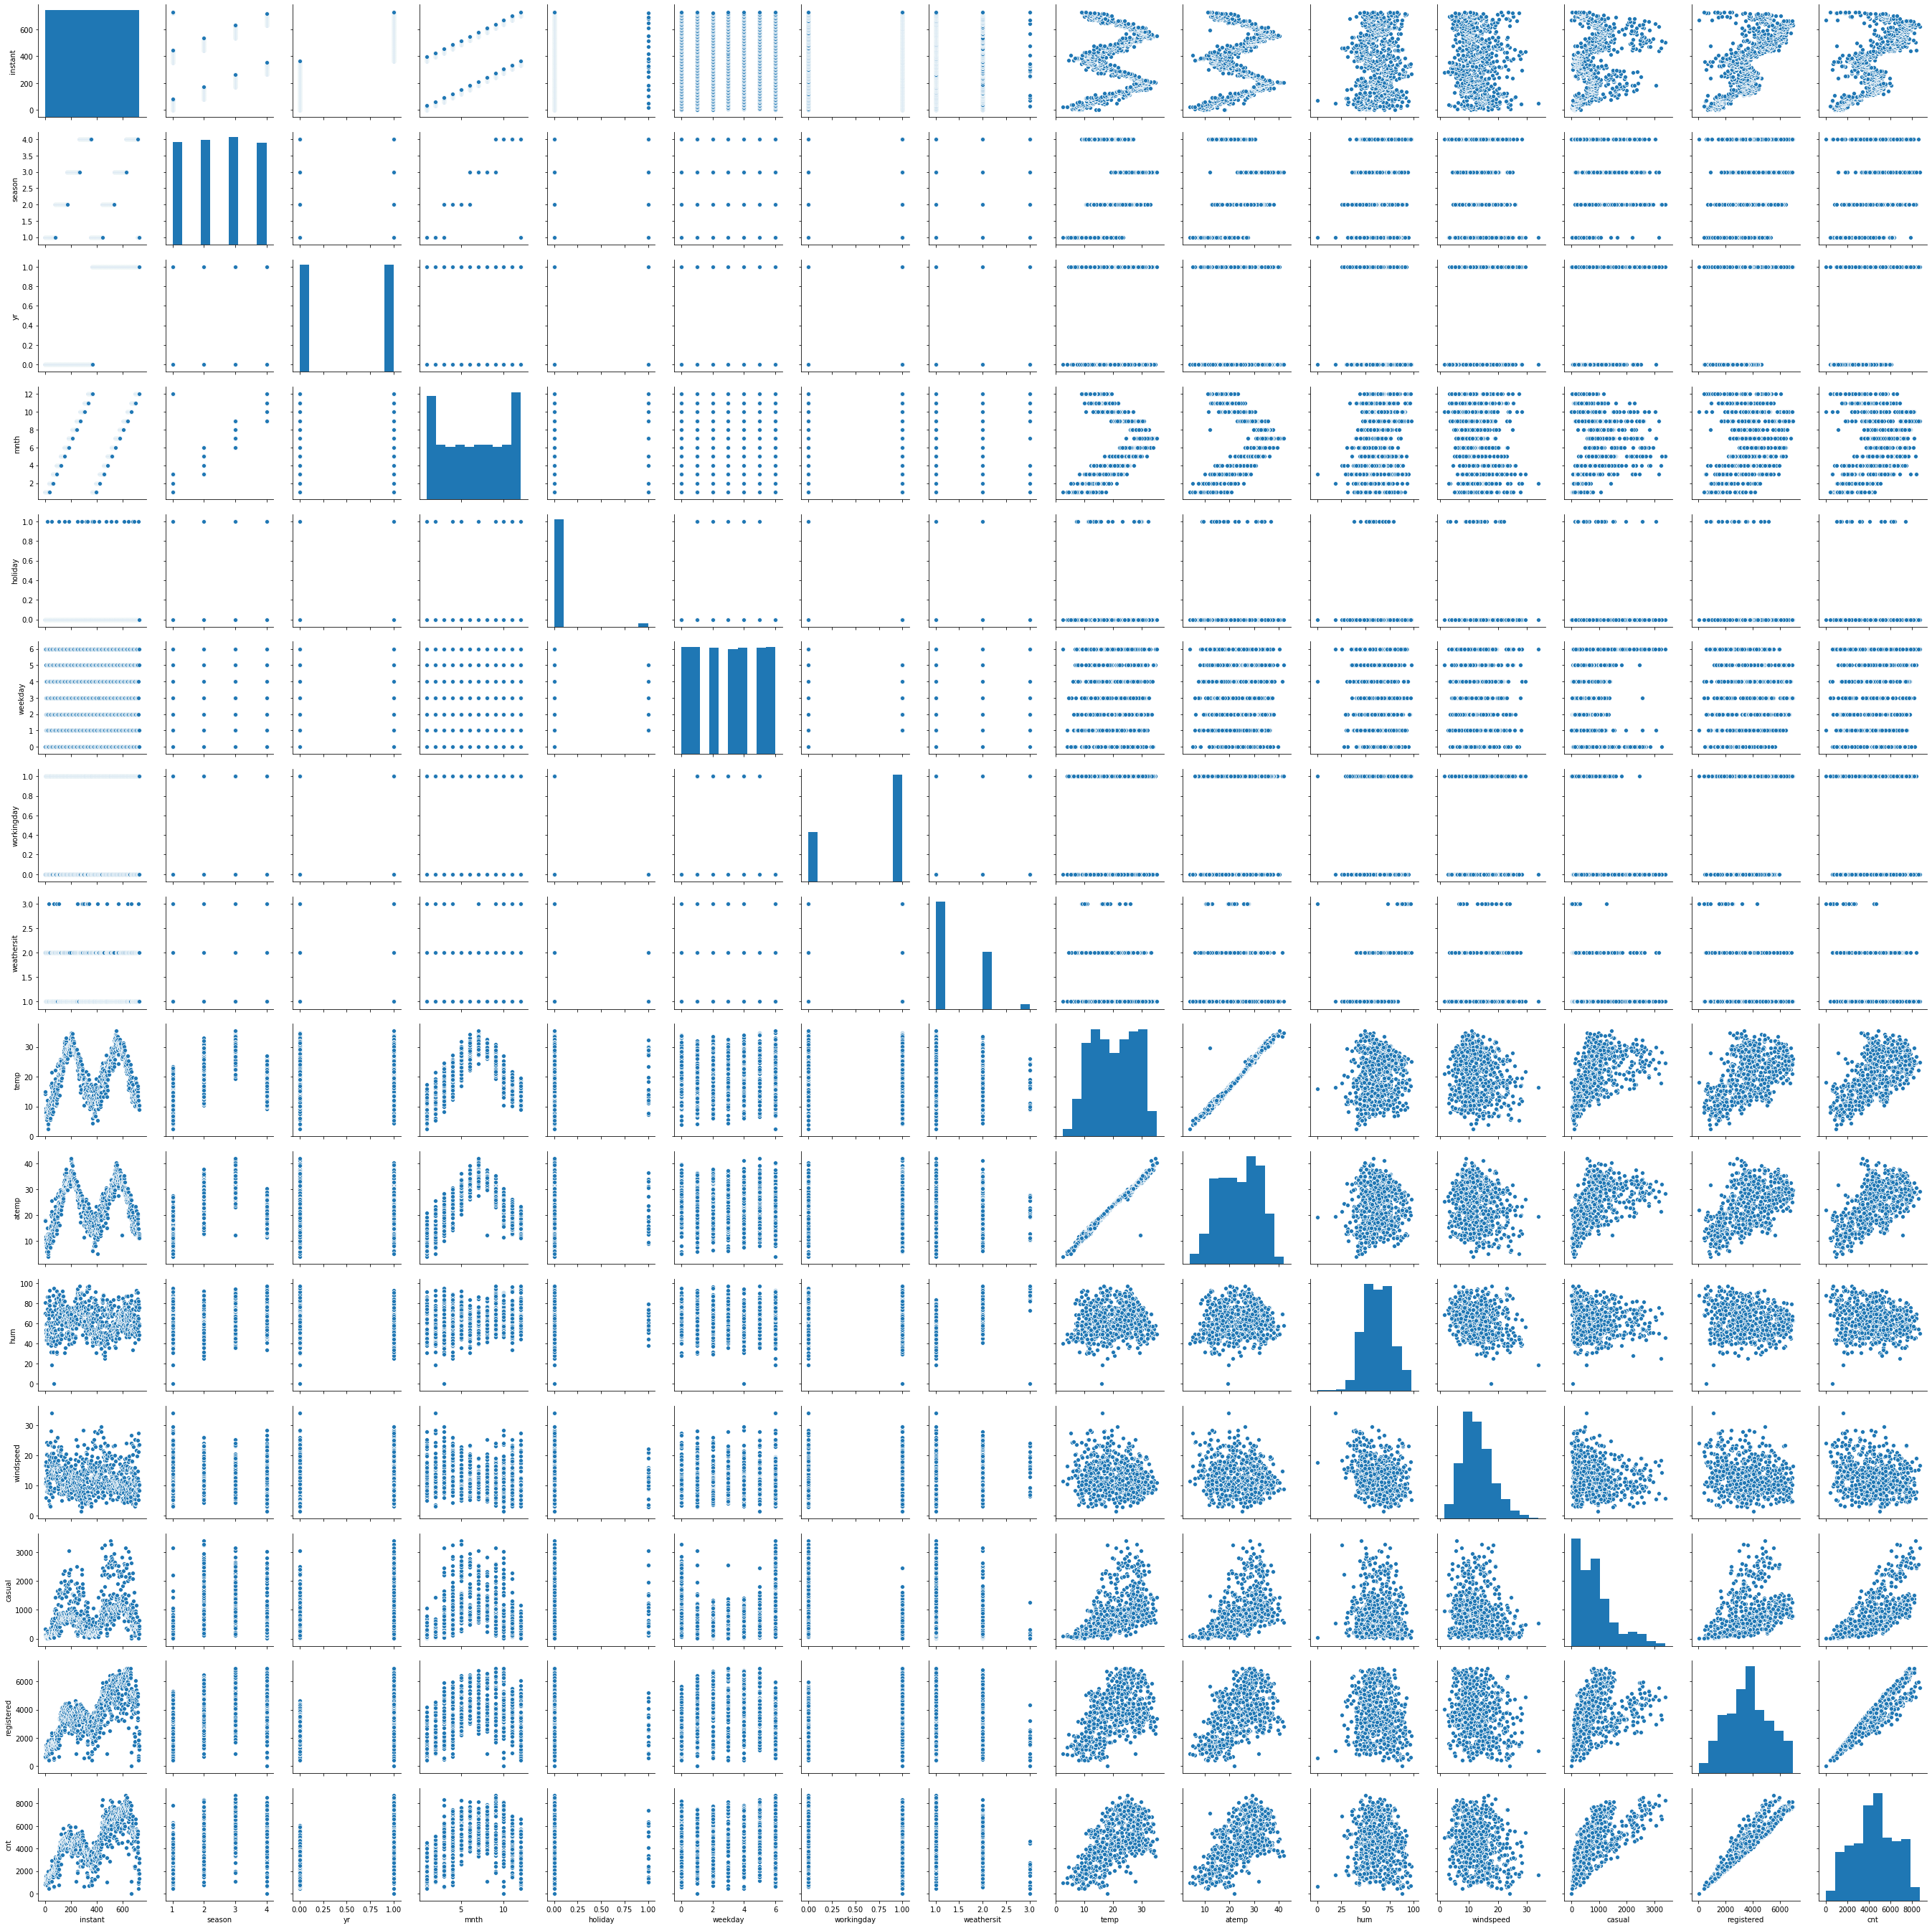

In [92]:
# visualization
plt.figure(figsize=(20, 8))
sns.pairplot(bike_df) 
plt.show()

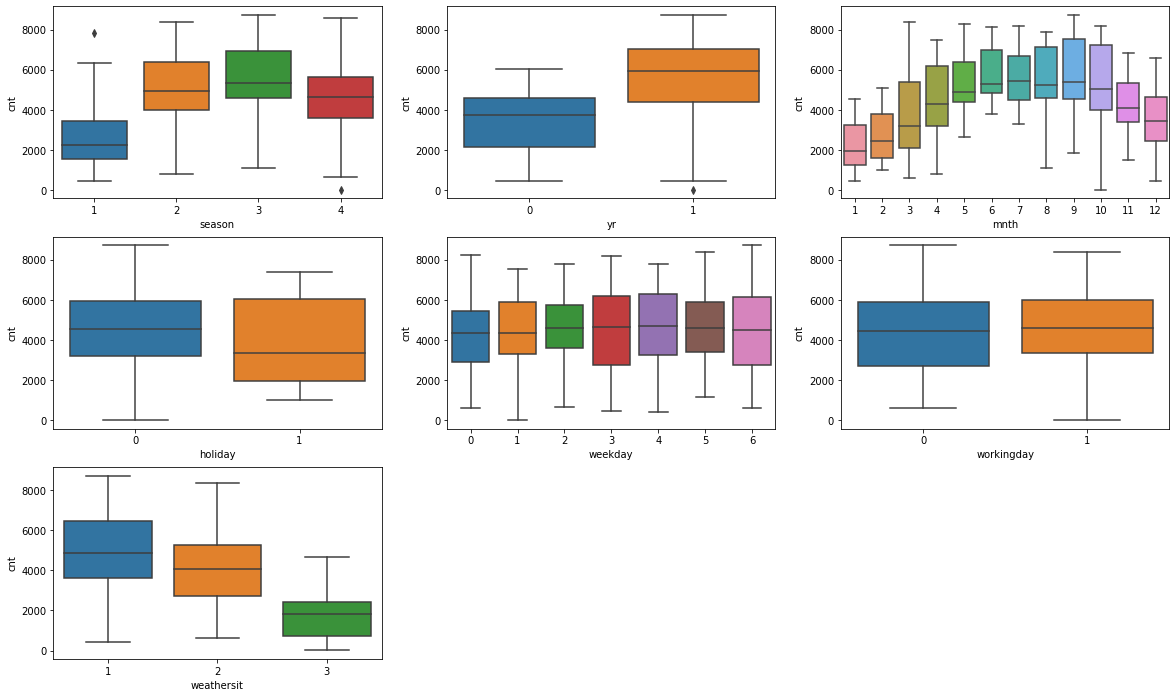

In [93]:
# Visualising categorical columns

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)  
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(3,3,2)  
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.show()

## Step:3 Data Preparation
From the dataframe we can predict that :

Categorical columns are - 
season, yr, mnth, holiday, weekday, workingday, weathersit

Continous columns are - 
temp, atemp, hum, windspeed

Target Column - cnt

In [94]:
# drop unnecessary columns

bike_df.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)
bike_df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [95]:
# changing datatype of categorical variables to object to create dummy variables

bike_df[['season','mnth','weekday','weathersit']] = bike_df[['season','mnth','weekday','weathersit']].astype(str)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Create dummy variables for categorical columns


In [96]:
# create dummy variable for season

seasons = pd.get_dummies(bike_df.season,drop_first=True)
seasons.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [97]:
seasons.rename(columns = {'2':'summer','3':'fall','4':'winter'}, inplace=True)
seasons.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [98]:
# Add the dummy variable dataframe 'seasons' to the original dataframe

bike_df = pd.concat([bike_df, seasons], axis = 1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [99]:
# create dummy variable for month column

months = pd.get_dummies(bike_df.mnth,drop_first=True)
months.rename(columns={'2':'february','3':'march','4':'april','5':'may','6':'june','7':'july','8':'august','9':'september','10':'october','11':'november','12':'december'},inplace=True)
months.head()

,october,november,december,february,march,april,may,june,july,august,september
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [100]:
# Add dummy variable column 'months' to original dataframe

bike_df = pd.concat([bike_df, months], axis = 1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,november,december,february,march,april,may,june,july,august,september
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [101]:
# create dummy variable for weekday

weekdays = pd.get_dummies(bike_df.weekday,drop_first=True)
weekdays.rename(columns={'1':'monday','2':'tuesday','3':'wednesday','4':'thursday','5':'friday','6':'saturday'},inplace=True)
weekdays.head()

,monday,tuesday,wednesday,thursday,friday,saturday
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [102]:
# Add dummy variable column weekdays to original dataframe

bike_df = pd.concat([bike_df, weekdays], axis = 1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,june,july,august,september,monday,tuesday,wednesday,thursday,friday,saturday
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,1,0,0,0


In [103]:
# create dummy variable for weathersit

weather = pd.get_dummies(bike_df.weathersit,drop_first=True)
weather.rename(columns={'2':'Mist','3':'Light Snow'},inplace=True)
weather.head()

,Mist,Light Snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [104]:
# Add dummy variable column weather to orginal dataframe

bike_df = pd.concat([bike_df, weather], axis = 1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,august,september,monday,tuesday,wednesday,thursday,friday,saturday,Mist,Light Snow
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,0,0,0


In [105]:
# Drop the columns whose dummy variables are created and added in the original dataframe
bike_df.drop(['season','weathersit','mnth','weekday'], axis = 1, inplace = True)
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,august,september,monday,tuesday,wednesday,thursday,friday,saturday,Mist,Light Snow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


# Step:4 splitting data into training data and testing data
spliting data in ratio 70:30

In [106]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
bike_df_train, bike_df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scaling on Continous variables of training data
using Min-Max Scaling

In [107]:
# min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() 
bike_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_df_train[bike_vars] = scaler.fit_transform(bike_df_train[bike_vars])
bike_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,august,september,monday,tuesday,wednesday,thursday,friday,saturday,Mist,Light Snow
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0


In [108]:
bike_df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,august,september,monday,tuesday,wednesday,thursday,friday,saturday,Mist,Light Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.096078,0.080392,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.294988,0.272166,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


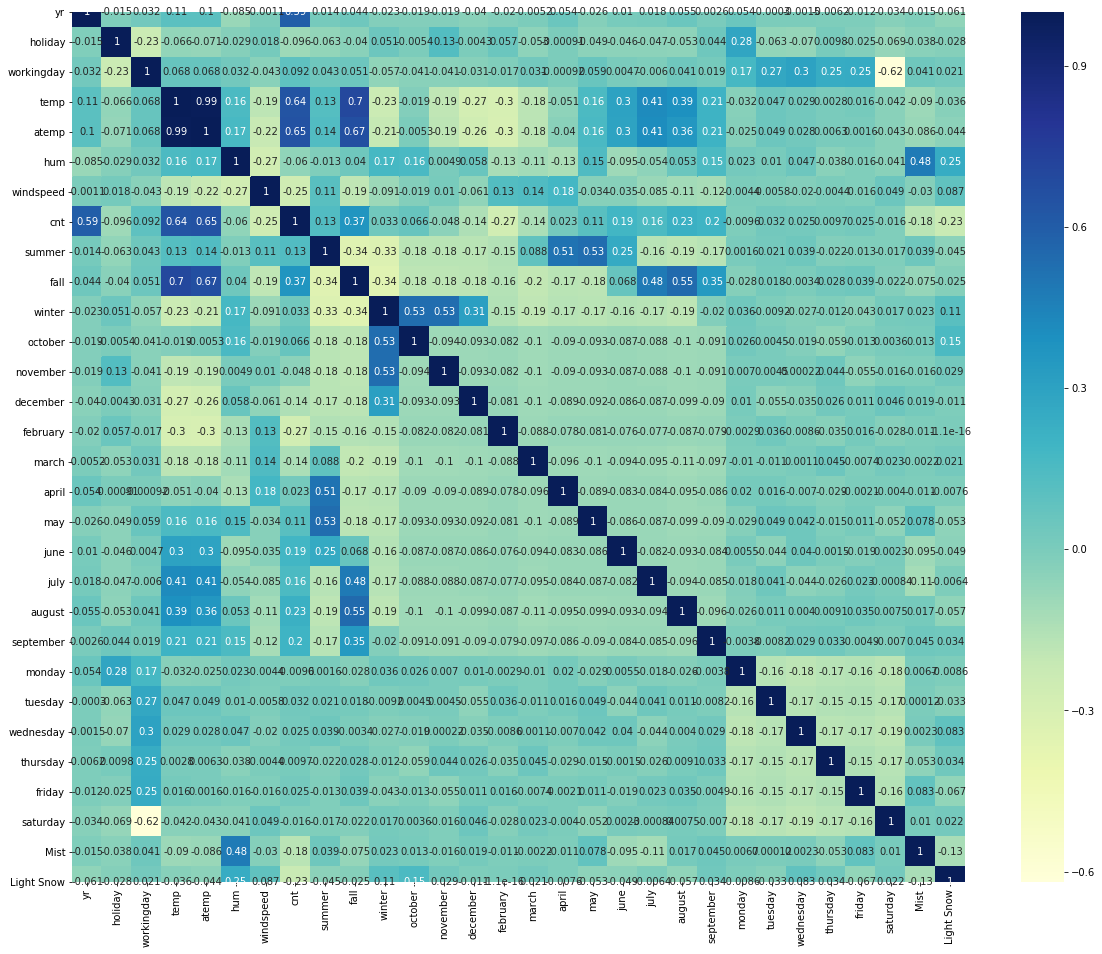

In [109]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=[20,16])
sns.heatmap(bike_df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

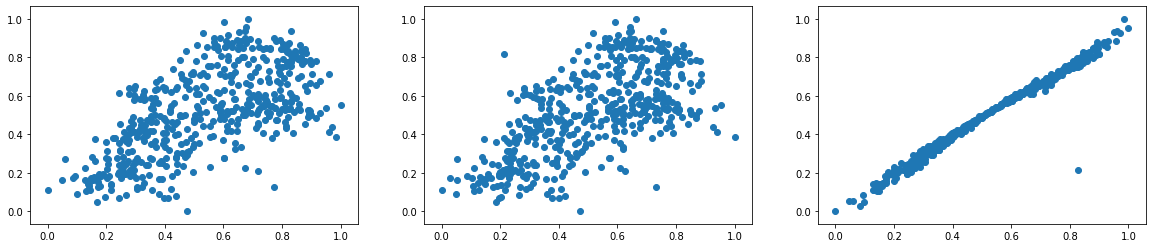

In [110]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)  
plt.scatter(bike_df_train.temp, bike_df_train.cnt)
plt.subplot(1,3,2)  
plt.scatter(bike_df_train.atemp, bike_df_train.cnt)
plt.subplot(1,3,3)  
plt.scatter(bike_df_train.temp, bike_df_train.atemp)
plt.show()

### Dividing into x and y for model building

In [111]:
y_train = bike_df_train.pop('cnt')
X_train = bike_df_train

# Step:5 Building a linear model
We will remove variables one by one using mixed approach that is (RFE + manual)

#### RFE approach
To select top 15 features.

In [112]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [113]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [114]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('october', True, 1),
 ('november', False, 9),
 ('december', False, 10),
 ('february', False, 7),
 ('march', False, 2),
 ('april', False, 4),
 ('may', False, 3),
 ('june', False, 5),
 ('july', False, 8),
 ('august', True, 1),
 ('september', True, 1),
 ('monday', False, 11),
 ('tuesday', False, 12),
 ('wednesday', False, 14),
 ('thursday', False, 15),
 ('friday', False, 13),
 ('saturday', True, 1),
 ('Mist', True, 1),
 ('Light Snow', True, 1)]

In [115]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'october', 'august', 'september', 'saturday', 'Mist',
       'Light Snow'],
      dtype='object')

In [116]:
X_train.columns[~rfe.support_]

Index(['atemp', 'november', 'december', 'february', 'march', 'april', 'may',
       'june', 'july', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday'],
      dtype='object')

## Building a model using stats library

#### Model -1

In [117]:
# Creating X_test dataframe with RFE selected variables
X_train_1 = X_train[col]

In [118]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_1 = sm.add_constant(X_train_1)

In [119]:
lm_1= sm.OLS(y_train,X_train_1.astype(float)).fit()

In [120]:
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.89e-191
Time:                        17:24:28   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1950      0.029      6.791      0.0

In [121]:
X_train_2 = X_train_1.drop(["fall"], axis = 1)

In [122]:
X_train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 15 columns):
const         510 non-null float64
yr            510 non-null int64
holiday       510 non-null int64
workingday    510 non-null int64
temp          510 non-null float64
hum           510 non-null float64
windspeed     510 non-null float64
summer        510 non-null uint8
winter        510 non-null uint8
october       510 non-null uint8
august        510 non-null uint8
september     510 non-null uint8
saturday      510 non-null uint8
Mist          510 non-null uint8
Light Snow    510 non-null uint8
dtypes: float64(4), int64(3), uint8(8)
memory usage: 35.9 KB


#### Model - 2 

In [123]:
# Rebuilding the model after removing 'fall'

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_2)
lm_2 = sm.OLS(y_train,X_train_lm.astype(float)).fit() 
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          3.24e-192
Time:                        17:24:28   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1945      0.029      6.770      0.0

In [124]:
X_train_2 = X_train_2.drop(['const'], axis=1)


In [125]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.59
3,temp,10.01
2,workingday,5.05
5,windspeed,3.82
7,winter,2.27
12,Mist,2.14
0,yr,2.03
11,saturday,1.90
6,summer,1.83
8,october,1.62


In [126]:
# drop 'hum' as vif value is high
X_train_3 = X_train_2.drop(["hum"], axis = 1)
X_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 13 columns):
yr            510 non-null int64
holiday       510 non-null int64
workingday    510 non-null int64
temp          510 non-null float64
windspeed     510 non-null float64
summer        510 non-null uint8
winter        510 non-null uint8
october       510 non-null uint8
august        510 non-null uint8
september     510 non-null uint8
saturday      510 non-null uint8
Mist          510 non-null uint8
Light Snow    510 non-null uint8
dtypes: float64(2), int64(3), uint8(8)
memory usage: 27.9 KB


#### Model - 3

In [127]:
# Rebuilding the model after removing 'hum'

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_3)
lm_3 = sm.OLS(y_train,X_train_lm.astype(float)).fit() 
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          6.16e-189
Time:                        17:24:29   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0945      0.019      4.961      0.0

In [128]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.38
2,workingday,4.39
4,windspeed,3.60
0,yr,2.02
6,winter,2.02
5,summer,1.82
10,saturday,1.77
7,october,1.62
8,august,1.59
11,Mist,1.54


In [129]:
# drop 'workingday'
X_train_4 = X_train_3.drop(["workingday"], axis = 1)
X_train_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 12 columns):
yr            510 non-null int64
holiday       510 non-null int64
temp          510 non-null float64
windspeed     510 non-null float64
summer        510 non-null uint8
winter        510 non-null uint8
october       510 non-null uint8
august        510 non-null uint8
september     510 non-null uint8
saturday      510 non-null uint8
Mist          510 non-null uint8
Light Snow    510 non-null uint8
dtypes: float64(2), int64(2), uint8(8)
memory usage: 23.9 KB


#### Model - 4

In [130]:
# Rebuilding the model after removing 'workingday'

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_4)
lm_4 = sm.OLS(y_train,X_train_lm.astype(float)).fit() 
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     211.9
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.26e-186
Time:                        17:24:29   Log-Likelihood:                 500.30
No. Observations:                 510   AIC:                            -974.6
Df Residuals:                     497   BIC:                            -919.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1324      0.017      7.859      0.0

In [131]:
# drop 'october' as having high p value
X_train_5 = X_train_4.drop(["october"], axis = 1)
X_train_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 11 columns):
yr            510 non-null int64
holiday       510 non-null int64
temp          510 non-null float64
windspeed     510 non-null float64
summer        510 non-null uint8
winter        510 non-null uint8
august        510 non-null uint8
september     510 non-null uint8
saturday      510 non-null uint8
Mist          510 non-null uint8
Light Snow    510 non-null uint8
dtypes: float64(2), int64(2), uint8(7)
memory usage: 23.4 KB


#### Model - 5

In [132]:
# Rebuilding the model after removing 'october'

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_5)
lm_5 = sm.OLS(y_train,X_train_lm.astype(float)).fit() 
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.5
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          5.28e-187
Time:                        17:24:29   Log-Likelihood:                 498.36
No. Observations:                 510   AIC:                            -972.7
Df Residuals:                     498   BIC:                            -921.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1281      0.017      7.649      0.0

In [133]:
# drop saturday due to high p value
X_train_6 = X_train_5.drop(["saturday"], axis = 1)
X_train_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 10 columns):
yr            510 non-null int64
holiday       510 non-null int64
temp          510 non-null float64
windspeed     510 non-null float64
summer        510 non-null uint8
winter        510 non-null uint8
august        510 non-null uint8
september     510 non-null uint8
Mist          510 non-null uint8
Light Snow    510 non-null uint8
dtypes: float64(2), int64(2), uint8(6)
memory usage: 22.9 KB


#### Model - 6

In [134]:
# Rebuilding the model after removing 'saturday'

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_6)
lm_6 = sm.OLS(y_train,X_train_lm.astype(float)).fit() 
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.26e-187
Time:                        17:24:29   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1312      0.017      7.871      0.0

In [135]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,summer,1.81
6,august,1.58
5,winter,1.49
8,Mist,1.48
7,september,1.31
9,Light Snow,1.08
1,holiday,1.04


In [136]:
# drop 'windspeed'
X_train_7 = X_train_6.drop(["windspeed"], axis = 1)
X_train_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 9 columns):
yr            510 non-null int64
holiday       510 non-null int64
temp          510 non-null float64
summer        510 non-null uint8
winter        510 non-null uint8
august        510 non-null uint8
september     510 non-null uint8
Mist          510 non-null uint8
Light Snow    510 non-null uint8
dtypes: float64(1), int64(2), uint8(6)
memory usage: 18.9 KB


#### Model - 7

In [137]:
# Rebuilding the model after removing 'windspeed'

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_7)
lm_7 = sm.OLS(y_train,X_train_lm.astype(float)).fit() 
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.99e-181
Time:                        17:24:29   Log-Likelihood:                 479.46
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0703      0.014      5.164      0.0

In [138]:
# drop 'august'
X_train_8 = X_train_7.drop(["august"], axis = 1)
X_train_8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 8 columns):
yr            510 non-null int64
holiday       510 non-null int64
temp          510 non-null float64
summer        510 non-null uint8
winter        510 non-null uint8
september     510 non-null uint8
Mist          510 non-null uint8
Light Snow    510 non-null uint8
dtypes: float64(1), int64(2), uint8(5)
memory usage: 18.4 KB


#### Model - 8 (Final Model)

In [139]:
# Rebuilding the model after removing 'august'

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_8)
lm_8 = sm.OLS(y_train,X_train_lm.astype(float)).fit() 
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     282.4
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          3.40e-180
Time:                        17:24:30   Log-Likelihood:                 473.63
No. Observations:                 510   AIC:                            -929.3
Df Residuals:                     501   BIC:                            -891.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0635      0.014      4.670      0.0

In [140]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.85
0,yr,1.94
3,summer,1.51
6,Mist,1.43
4,winter,1.34
5,september,1.19
7,Light Snow,1.06
1,holiday,1.03


# Residual Analysis of train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [141]:
y_train_cnt = lm_8.predict(X_train_lm)

Text(0.5, 0, 'Errors')

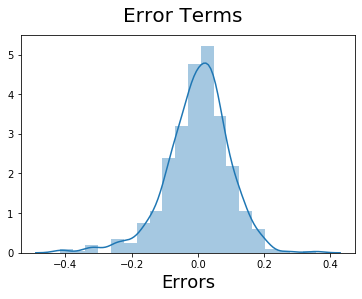

In [142]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18)                         

### Validating Assumptions

- No multicollinearity is present as VIF value for all feature variables is less than 5.
- No overfitting as R-squared(0.818) and adjusted R-squared(0.816) are almost same.
- Coefficients of feature variableas are statistically significant as it has p-value less than 0.05.
- Homoscedasticity is present.
- Normal distribution of residuals(error terms), from graph mean is zero and it is normally distributed.

# Making predictions
Apply scaling on test data

In [144]:
bike_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_df_test[bike_vars] = scaler.transform(bike_df_test[bike_vars])

## Dividing x and y dataset

In [145]:
y_test = bike_df_test.pop('cnt')
X_test = bike_df_test

In [146]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_8.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [147]:
# Making predictions
y_pred = lm_8.predict(X_test_new)

# Model Evaluation

In [148]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7985648542341641

Text(0, 0.5, 'y_pred')

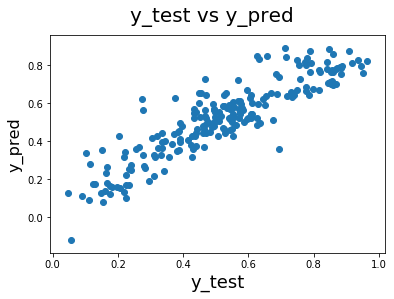

In [149]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          

We can see that from model 8(lm_8) the equation of our best fitted plane is:

$ cnt = 0.064 + (0.232  \times  yr) - (0.103  \times  holiday) + (0.573 \times temp) + (0.082 \times summer) + (0.138 \times winter) + (0.108 \times september) – (0.078 \times Mist) –  (0.299 \times LightSnow) $